# Linear Regression with python

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

Author: Pooja Parkar

Email-ID:poojaparkar1162@gmail.com

LinkedIn- http://linkedin.com/in/pooja-parkar-4698081bb

In [66]:
# Importing all libraries required 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import statsmodels.api as sm


In [67]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [69]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [70]:
data.isna().sum()

Hours     0
Scores    0
dtype: int64

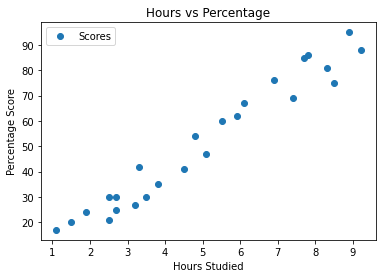

In [71]:
#scatter plot between Hours and Scores 
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

# Preparing data

In [72]:
X= data['Hours'] 
y = data['Scores']  

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [74]:
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

In [75]:
X_train.shape

(20, 1)

# Training the Algorithm

In [76]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [77]:
print(lm.intercept_)

[2.01816004]


In [78]:
print(lm.coef_)

[[9.91065648]]


In [79]:
y_res=lm.intercept_+lm.coef_*X_train
y_res

array([[39.67865467],
       [20.84840735],
       [79.32128059],
       [70.40168976],
       [12.91988217],
       [52.56250809],
       [78.33021494],
       [34.72332643],
       [84.27660883],
       [93.19619966],
       [62.47316457],
       [36.70545772],
       [28.77693254],
       [56.52677068],
       [28.77693254],
       [86.25874013],
       [26.79480124],
       [49.58931115],
       [90.22300272],
       [46.6161142 ]])

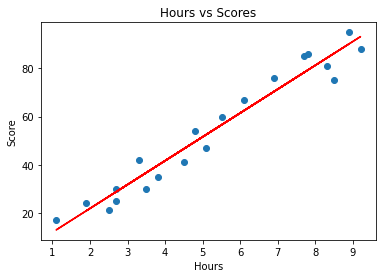

In [80]:
#plot train data
plt.scatter(X_train,y_train)
plt.plot(X_train, y_res, color='red')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

In [81]:
y_train_pred=lm.predict(X_train)
y_test_pred=lm.predict(X_test)
y_train_pred

array([[39.67865467],
       [20.84840735],
       [79.32128059],
       [70.40168976],
       [12.91988217],
       [52.56250809],
       [78.33021494],
       [34.72332643],
       [84.27660883],
       [93.19619966],
       [62.47316457],
       [36.70545772],
       [28.77693254],
       [56.52677068],
       [28.77693254],
       [86.25874013],
       [26.79480124],
       [49.58931115],
       [90.22300272],
       [46.6161142 ]])

In [82]:
y_test_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

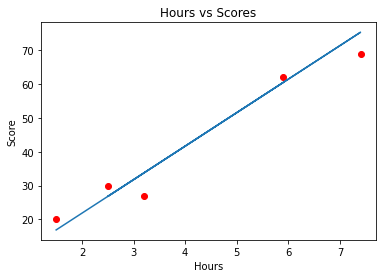

In [83]:
plt.plot(X_test,y_test_pred)
plt.scatter(X_test, y_test, color='red')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

# Evaluting the model

In [84]:
from sklearn.metrics import mean_squared_error,r2_score
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, y_test_pred))

Mean Squared Error: 21.5987693072174


In [85]:
from sklearn import metrics
print('Mean Absolute Error:',
      metrics.mean_absolute_error(y_test, y_test_pred))


Mean Absolute Error: 4.183859899002975


In [86]:
print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9515510725211552
0.9454906892105356


# prediction the scores

In [87]:
hours=[[9.25]]
res=lm.predict(hours)
print("student studied no. of hours={}".format(hours))
print("predicted score={}".format(res[0]))

student studied no. of hours=[[9.25]]
predicted score=[93.69173249]
